##### Visualize Results

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


##### Load Data

In [3]:
airports = pd.read_csv('cleaned_airports.csv')
routes = pd.read_csv('cleaned_routes.csv')

# Visualize the data preview
display(airports.head())
display(routes.head())

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz Database Timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


,Airline,Airline ID,Source,Source ID,Destination,Destination ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


#### Create Graph

In [4]:
# Direct graph creation with NetworkX
G = nx.DiGraph()

# Add nodes
for index, row in airports.iterrows():
    G.add_node(row['Airport ID'], name=row['Name'], city=row['City'], country=row['Country'])

# Add edges
for index, row in routes.iterrows():
    G.add_edge(row['Source ID'], row['Destination ID'])

# Information on the Graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 9407
Number of edges: 37505


#### Degree Distribution Analysis

Goal: Check if the network exhibits scale-free properties.


In [5]:
# Calculate in-degrees, out-degrees, and total degrees
in_degrees = [deg for _, deg in G.in_degree()]   # In-degree for each node
out_degrees = [deg for _, deg in G.out_degree()] # Out-degree for each node
total_degrees = [deg for _, deg in G.degree()]   # Total degree (in + out) for each node


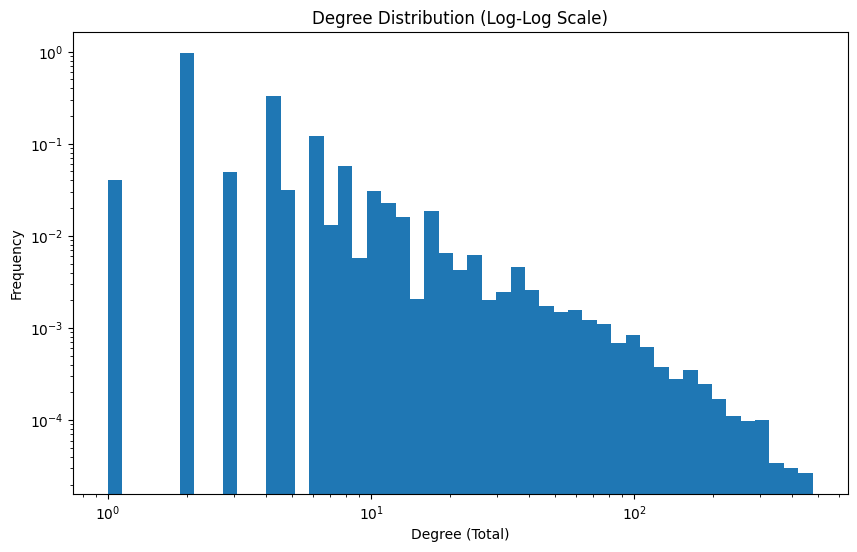

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Log-log plot of total degree distribution
plt.figure(figsize=(10, 6))
plt.hist(total_degrees, bins=np.logspace(np.log10(1), np.log10(max(total_degrees)), 50), density=True)
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Degree (Total)')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')
plt.show()


Calculating best minimal value for power law fit
Power-law exponent (gamma): 1.848286607778054


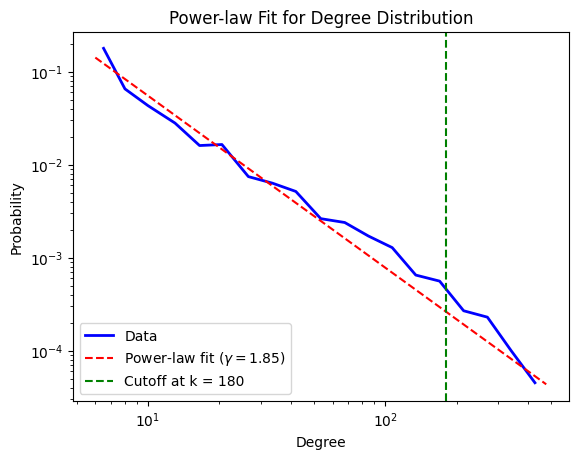

In [7]:
import powerlaw
import numpy as np

# Remove degrees of 0 to avoid issues with log scale
degrees = np.array(total_degrees)
degrees = degrees[degrees > 0]

# Fit the distribution
fit = powerlaw.Fit(degrees)

# Print the power-law exponent
print(f"Power-law exponent (gamma): {fit.power_law.alpha}")

# Plot the fitted distribution
fit.plot_pdf(color='b', linewidth=2, label='Data')
fit.power_law.plot_pdf(color='r', linestyle='--', label=f'Power-law fit ($\\gamma={fit.power_law.alpha:.2f}$)')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Power-law Fit for Degree Distribution')
cutoff_kx = 180
plt.axvline(cutoff_kx, color='green', linestyle='--', label=f'Cutoff at k = {cutoff_kx}')
plt.legend()
plt.show()




##### Interpretation of the Result


##Exponent γ\gammaγ:

•	A power-law exponent γ≈1.85 indicates that the network is indeed scale-free.
•	This value aligns with real-world networks where 2≤γ≤32 is typical. The result is slightly below this range, which suggests the network has a relatively slower decay in degree distribution compared to other networks.

##Scale-Free Property:
•	The plot shows a straight line on a log-log scale, confirming that the degree distribution follows a power-law.
•	This means the network is dominated by a few high-degree nodes (hubs), consistent with the structure of airline networks.

##Comparison with the Paper:
•	The 2014 paper reported γ=1.5. My result (γ=1.85) is slightly higher, meaning the network's degree distribution decays faster. This could be due to:
    o	Differences in the dataset (e.g., coverage of routes or airports).
    o	Changes in airline network structure over time.
•	The cutoff kx=180 might still apply, but it would require further inspection (e.g., checking if there’s a sharp drop-off in probability around k=180).



##### Clustering Coefficient Analysis


In [8]:
# Convert the graph to undirected
undirected_G = G.to_undirected()

# Calculate the global clustering coefficient
global_clustering = nx.average_clustering(undirected_G)
print(f"Global Clustering Coefficient: {global_clustering}")


Global Clustering Coefficient: 0.17499049821340465


In [9]:
# Calculate local clustering coefficients
local_clustering = nx.clustering(undirected_G)

# Display the first 10 nodes and their clustering coefficients
for node, coef in list(local_clustering.items())[:10]:
    print(f"Node {node}: Clustering Coefficient = {coef}")


Node 1: Clustering Coefficient = 0
Node 2: Clustering Coefficient = 0
Node 3: Clustering Coefficient = 0
Node 4: Clustering Coefficient = 0
Node 5: Clustering Coefficient = 0
Node 6: Clustering Coefficient = 0
Node 7: Clustering Coefficient = 0
Node 8: Clustering Coefficient = 0
Node 9: Clustering Coefficient = 0
Node 10: Clustering Coefficient = 0


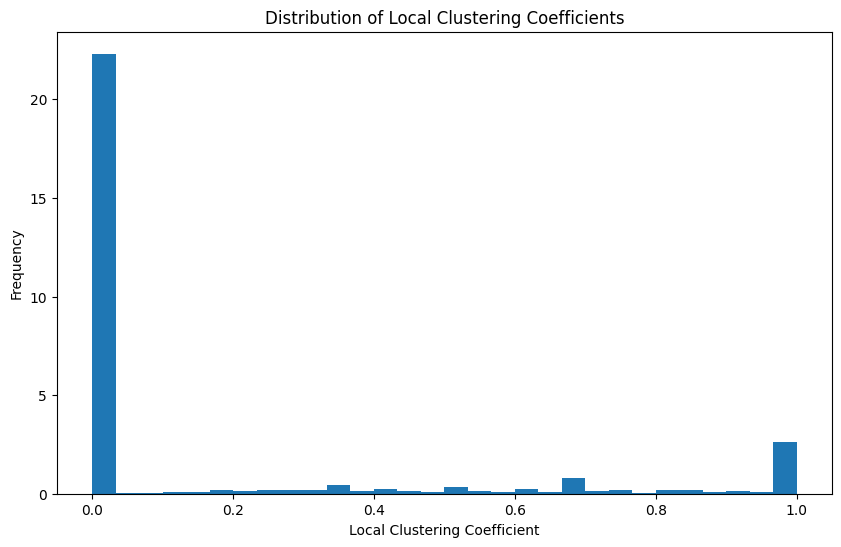

In [10]:
import matplotlib.pyplot as plt

# Plot the distribution of local clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(list(local_clustering.values()), bins=30, density=True)
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Local Clustering Coefficients')
plt.show()


#### Average Path Length Analysis


In [11]:
# Extract the largest strongly connected component
if not nx.is_strongly_connected(G):
    largest_component = max(nx.strongly_connected_components(G), key=len)
    G_lcc = G.subgraph(largest_component).copy()
else:
    G_lcc = G

print(f"Largest Connected Component - Nodes: {G_lcc.number_of_nodes()}, Edges: {G_lcc.number_of_edges()}")


Largest Connected Component - Nodes: 3268, Edges: 37407


In [12]:
# Calculate the average shortest path length
avg_path_length = nx.average_shortest_path_length(G_lcc)
print(f"Average Path Length: {avg_path_length}")


Average Path Length: 3.9885065933246637


#### Assortativity analysis

In [13]:
# Degree assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {assortativity}")


Degree Assortativity Coefficient: -0.01680190167861687


#### Betweeness Centrality

In [14]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Sort and display the top 10 nodes by centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Betweenness Centrality:")
for node, centrality in top_betweenness:
    print(f"Node {node}: Centrality = {centrality}")


Top 10 Nodes by Betweenness Centrality:
Node \N: Centrality = 0.009342151341243844
Node 3774: Centrality = 0.008563381995277713
Node 3484: Centrality = 0.007319903202975707
Node 1382: Centrality = 0.007209369780260848
Node 2188: Centrality = 0.006568336268996021
Node 340: Centrality = 0.006013477866439698
Node 3364: Centrality = 0.005828255569815603
Node 3830: Centrality = 0.005802881505178819
Node 193: Centrality = 0.005177634013293713
Node 580: Centrality = 0.005157055157696662


#### Robustness Analysis

In [15]:
# Identify the top 5 hubs by degree
top_hubs = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Hubs:", [hub[0] for hub in top_hubs])

# Remove top hubs and recalculate metrics
G_removed = G.copy()
G_removed.remove_nodes_from([hub[0] for hub in top_hubs])

# Calculate the largest connected component after removal
largest_component = max(nx.connected_components(G_removed.to_undirected()), key=len)
print(f"Largest Component Size After Removing Top Hubs: {len(largest_component)}")


Top 5 Hubs: ['340', '1382', '580', '1701', '3682']
Largest Component Size After Removing Top Hubs: 3287


####  Eigenvector Centrality


In [16]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Display the top 10 nodes by eigenvector centrality
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Eigenvector Centrality:")
for node, centrality in top_eigenvector:
    print(f"Node {node}: Centrality = {centrality}")


Top 10 Nodes by Eigenvector Centrality:
Node 580: Centrality = 0.1657136538780829
Node 340: Centrality = 0.1656289673991003
Node 1382: Centrality = 0.15910637803933894
Node 346: Centrality = 0.1487526890643569
Node 507: Centrality = 0.13728347353815618
Node 1555: Centrality = 0.13572449584209306
Node 1701: Centrality = 0.13001995047129417
Node 1218: Centrality = 0.12917786892110256
Node 1678: Centrality = 0.12601771205406315
Node 1229: Centrality = 0.12307675818976488


#### Core-Periphery Structure


In [17]:
# Create a simple undirected graph from the directed graph
undirected_simple_G = nx.Graph()
undirected_simple_G.add_edges_from(G.edges())  # Add edges without attributes

# Remove self-loops if they exist
undirected_simple_G.remove_edges_from(nx.selfloop_edges(undirected_simple_G))

# Calculate core numbers
core_numbers = nx.core_number(undirected_simple_G)
print("Core Numbers (Top 10):", sorted(core_numbers.items(), key=lambda x: x[1], reverse=True)[:10])




Core Numbers (Top 10): [('4029', 31), ('1701', 31), ('2948', 31), ('2985', 31), ('1688', 31), ('4317', 31), ('2188', 31), ('1590', 31), ('1587', 31), ('2939', 31)]


#### Modularity and Community Detection


In [18]:
pip install python-louvain


Note: you may need to restart the kernel to use updated packages.


Number of Communities: 6104
Example Community: (0, [1])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18348\2042778218.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', num_communities)  # Generate a colormap


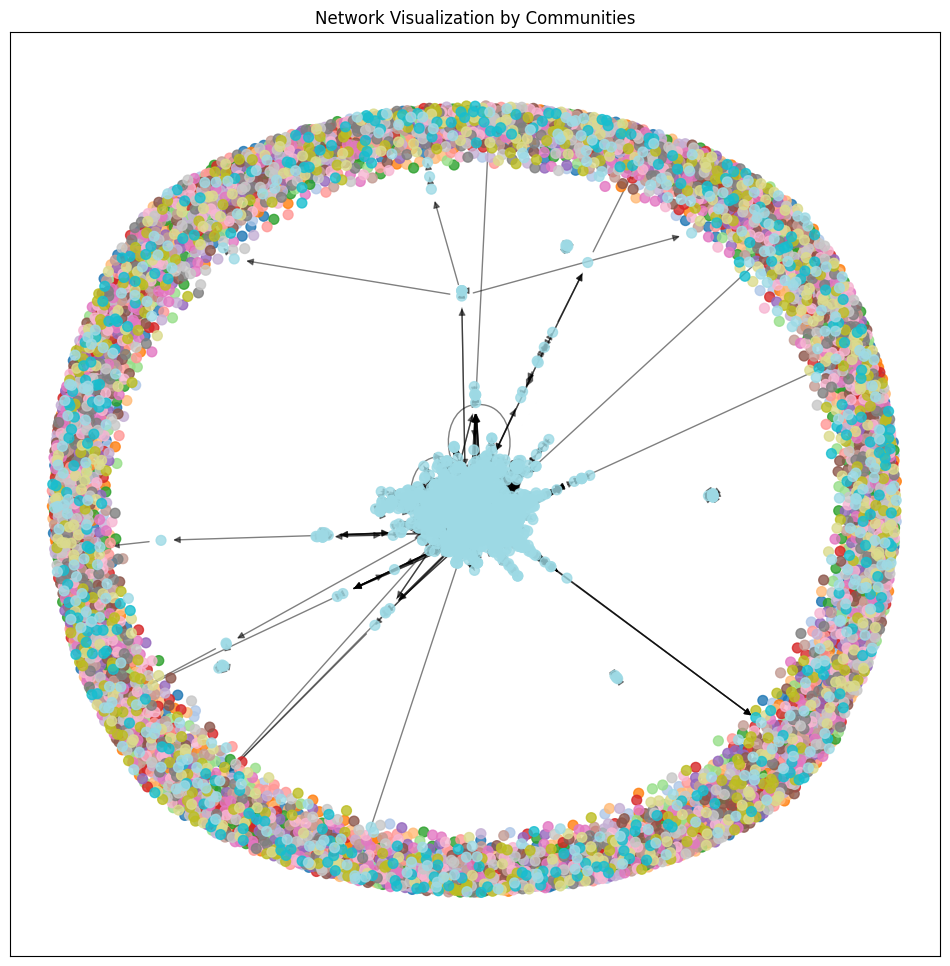

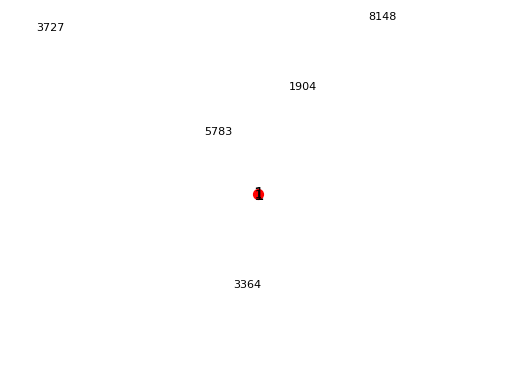

In [19]:
#Detect communities 
import community as community_louvain
import matplotlib.cm as cm

# Perform community detection
partition = community_louvain.best_partition(G.to_undirected())

# Display the number of communities
num_communities = len(set(partition.values()))
print(f"Number of Communities: {num_communities}")

# Display nodes in each community
from collections import defaultdict
communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)
print("Example Community:", list(communities.items())[0])



# Assign colors based on community
colors = [partition[node] for node in G.nodes()]
color_map = cm.get_cmap('tab20', num_communities)  # Generate a colormap


# Draw the network with nodes colored by their community
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Spring layout for visualization

# Draw nodes and color them by community
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=color_map, node_color=colors, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add title
plt.title("Network Visualization by Communities")
plt.show()

nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

community_id = 0  # Choose a community
community_nodes = [node for node, comm in partition.items() if comm == community_id]
subgraph = G.subgraph(community_nodes)
nx.draw(subgraph, pos, with_labels=True, node_color="red", node_size=50)


#### Closeness Centrality

In [20]:
# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)

# Sort and display the top 10 nodes by closeness centrality
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Closeness Centrality:")
for node, centrality in top_closeness:
    print(f"Node {node}: Centrality = {centrality}")


Top 10 Nodes by Closeness Centrality:
Node 340: Centrality = 0.1417945844843801
Node 507: Centrality = 0.14154980961597302
Node 1382: Centrality = 0.14097617045137434
Node 2188: Centrality = 0.1396216195555268
Node 580: Centrality = 0.13839288197535157
Node 3484: Centrality = 0.13663043989354215
Node 3797: Centrality = 0.13604751789352232
Node 1701: Centrality = 0.13593474908058512
Node 193: Centrality = 0.13421828083544268
Node 11051: Centrality = 0.13392078347941452


#### Reciproty

In [21]:
# Calculate the reciprocity of the graph
reciprocity = nx.reciprocity(G)
print(f"Reciprocity: {reciprocity}")


Reciprocity: 0.9758698840154646


#### Diameter and Eccentricity

In [22]:
# For undirected graph, extract the largest connected component
undirected_G = G.to_undirected()
if not nx.is_connected(undirected_G):
    G_lcc = undirected_G.subgraph(max(nx.connected_components(undirected_G), key=len))
else:
    G_lcc = undirected_G

# Calculate diameter
diameter = nx.diameter(G_lcc)
print(f"Diameter: {diameter}")

# Calculate eccentricity
eccentricity = nx.eccentricity(G_lcc)
print(f"Eccentricity (Example Node): {list(eccentricity.items())[:1]}")


Diameter: 13
Eccentricity (Example Node): [('120', 8)]


#### Clustering VS Degrees


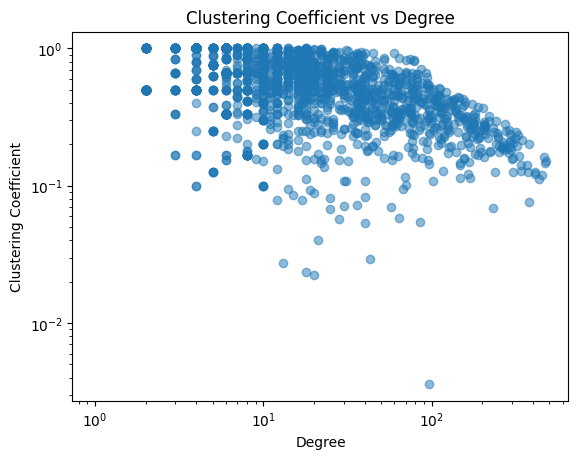

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate clustering coefficients and degrees
clustering = nx.clustering(G)
degree = dict(G.degree())

# Scatter plot of clustering coefficient vs degree
plt.scatter(list(degree.values()), list(clustering.values()), alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient vs Degree')
plt.show()


#### Subgraph

In [24]:
# Extract subgraph of top 10 hubs
top_nodes = [hub[0] for hub in sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]]
subgraph = G.subgraph(top_nodes)
print(f"Subgraph Nodes: {subgraph.number_of_nodes()}, Edges: {subgraph.number_of_edges()}")


Subgraph Nodes: 10, Edges: 66


Index(['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz Database Timezone',
       'Type', 'Source'],
      dtype='object')
Mapped Top Eigenvector Centralities: [('Amsterdam Airport Schiphol', 0.1657), ('Frankfurt am Main Airport', 0.1656), ('Charles de Gaulle International Airport', 0.1591), ('Munich Airport', 0.1488), ('London Heathrow Airport', 0.1373), ('Leonardo da Vinci–Fiumicino Airport', 0.1357), ('Atatürk International Airport', 0.13), ('Barcelona International Airport', 0.1291), ('Zürich Airport', 0.126), ('Adolfo Suárez Madrid–Barajas Airport', 0.1231)]


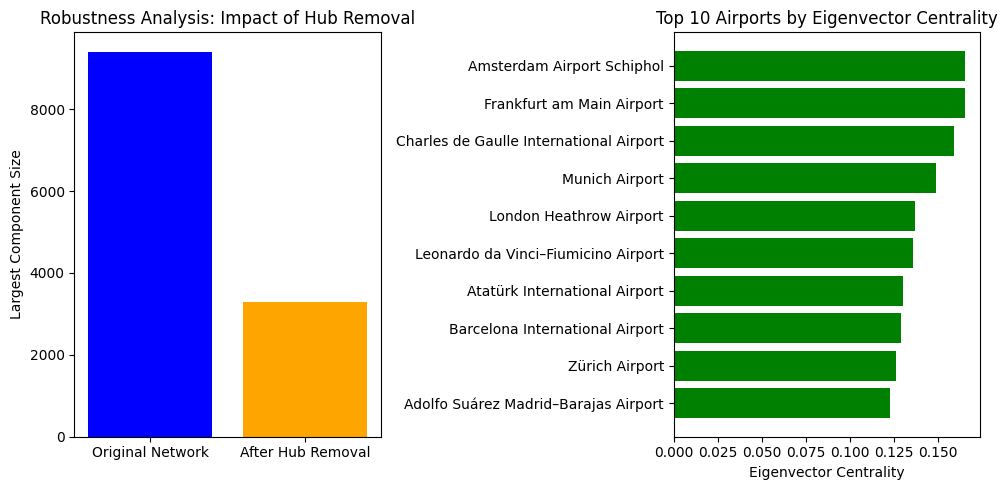

In [ ]:
airports = pd.read_csv('cleaned_airports.csv') 

# Verify the column names
print(airports.columns)

# Create a mapping from node ID to airport name
if 'Airport ID' in airports.columns and 'Name' in airports.columns:
    airport_names = airports.set_index('Airport ID')['Name'].to_dict()
else:
    raise ValueError("Check the column names in the 'cleaned_airports.csv' file. Required: 'Airport ID' and 'Name'.")

sizes = [9407, 3287]  
labels = ['Original Network', 'After Hub Removal']

# Bar chart for Robustness Analysis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # First subplot
plt.bar(labels, sizes, color=['blue', 'orange'])
plt.ylabel('Largest Component Size')
plt.title('Robustness Analysis: Impact of Hub Removal')

# Eigenvector Centrality: Top 10 Nodes
top_eigenvector = [('580', 0.1657), ('340', 0.1656), ('1382', 0.1591),
                   ('346', 0.1488), ('507', 0.1373), ('1555', 0.1357),
                   ('1701', 0.1300), ('1218', 0.1291), ('1678', 0.1260),
                   ('1229', 0.1231)]

# Replace node IDs with airport names
top_eigenvector_named = [(airport_names.get(int(node), f"Node {node}"), centrality) for node, centrality in top_eigenvector]

# Verify the mapping results
print("Mapped Top Eigenvector Centralities:", top_eigenvector_named)

# Extract data for plotting
nodes, centralities = zip(*top_eigenvector_named)

# Bar chart for Eigenvector Centrality
plt.subplot(1, 2, 2)  # Second subplot
plt.barh(nodes, centralities, color='green')
plt.xlabel('Eigenvector Centrality')
plt.title('Top 10 Airports by Eigenvector Centrality')
plt.gca().invert_yaxis()  # Invert to show highest first

# Adjust layout and display both plots
plt.tight_layout()
plt.show()
